In [3]:
import pickle

from benchmark import bench_frame, bench_instance, load_instances, bench_looping
from itertools import product
import pandas as pd
import networkx as nx

In [5]:
load_instances(4)

instance tdvp scipy gradient_descent
p i                                                                      
1 0  <MaxCut.MaxCut object at 0x7ff5c11f0d30>  NaN   NaN              NaN
  1  <MaxCut.MaxCut object at 0x7ff577a43250>  NaN   NaN              NaN
  2  <MaxCut.MaxCut object at 0x7ff5dc67a890>  NaN   NaN              NaN
  3  <MaxCut.MaxCut object at 0x7ff5753d93f0>  NaN   NaN              NaN
  4  <MaxCut.MaxCut object at 0x7ff5753d9120>  NaN   NaN              NaN
  5  <MaxCut.MaxCut object at 0x7ff5753d91b0>  NaN   NaN              NaN
2 0  <MaxCut.MaxCut object at 0x7ff5c11f0d30>  NaN   NaN              NaN
  1  <MaxCut.MaxCut object at 0x7ff577a43250>  NaN   NaN              NaN
  2  <MaxCut.MaxCut object at 0x7ff5dc67a890>  NaN   NaN              NaN
  3  <MaxCut.MaxCut object at 0x7ff5753d93f0>  NaN   NaN              NaN
  4  <MaxCut.MaxCut object at 0x7ff5753d9120>  NaN   NaN              NaN
  5  <MaxCut.MaxCut object at 0x7ff5753d91b0>  NaN   NaN              NaN
3 0  <MaxCut.MaxCut object at 0x7ff5c11f0d30>  NaN   NaN              NaN
  1  <MaxCut.MaxCut object at 0x7ff577a43250>  NaN   NaN              NaN
  2  <MaxCut.MaxCut object at 0x7ff5dc67a890>  NaN   NaN              NaN
  3  <MaxCut.MaxCut object at 0x7ff5753d93f0>  NaN   NaN              NaN
  4  <MaxCut.MaxCut object at 0x7ff5753d9120>  NaN   NaN              NaN
  5  <MaxCut.MaxCut object at 0x7ff5753d91b0>  NaN   NaN              NaN
4 0  <MaxCut.MaxCut object at 0x7ff5c11f0d30>  NaN   NaN              NaN
  1  <MaxCut.MaxCut object at 0x7ff577a43250>  NaN   NaN              NaN
  2  <MaxCut.MaxCut object at 0x7ff5dc67a890>  NaN   NaN              NaN
  3  <MaxCut.MaxCut object at 0x7ff5753d93f0>  NaN   NaN              NaN
  4  <MaxCut.MaxCut object at 0x7ff5753d9120>  NaN   NaN              NaN
  5  <MaxCut.MaxCut object at 0x7ff5753d91b0>  NaN   NaN              NaN
5 0  <MaxCut.MaxCut object at 0x7ff5c11f0d30>  NaN   NaN              NaN
  1  <MaxCut.MaxCut object at 0x7ff577a43250>  NaN   NaN              NaN
  2  <MaxCut.MaxCut object at 0x7ff5dc67a890>  NaN   NaN              NaN
  3  <MaxCut.MaxCut object at 0x7ff5753d93f0>  NaN   NaN              NaN
  4  <MaxCut.MaxCut object at 0x7ff5753d9120>  NaN   NaN              NaN
  5  <MaxCut.MaxCut object at 0x7ff5753d91b0>  NaN   NaN              NaN

In [9]:
inst = [i for i in load_instances(4).xs(1, level='p', drop_level=False)['instance']]

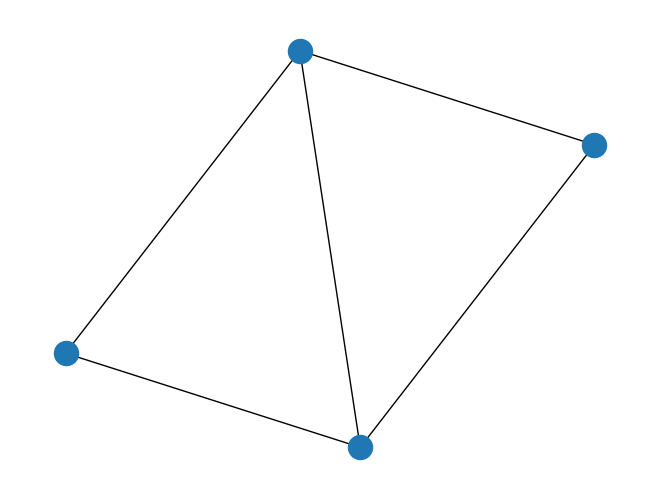

In [18]:
nx.draw(inst[4].graph)

In [19]:
for n in range(, , 1):
    print("n=",n)
    bench_frame(
        load_instances(n),
        optimizers={"tdvp": True, "scipy": True, "gradient_descent": False},
        path=f"./results/n{n}_results.p",
        tollarance=1e-1,
        max_iter=1,
        tdvp_range=10,
    )


n= 5
Running benchmark on 50 instances with optimizers ('tdvp', 'scipy')
optimizing with tdvp
donestep 79

(2.316267683269757, 0.8887183485768934)
optimizing with scipy
Done Scipy_optim

optimizing with tdvp
donestep 59

(0.7256430436457183, 1.246619227479209)
optimizing with scipy
Done Scipy_optim

optimizing with tdvp
donestep 28

(1.0136627410501966, 0.9331859630465451)
optimizing with scipy
Done Scipy_optim

optimizing with tdvp
donestep 23

(1.0038924122167119, 0.9922595691627649)
optimizing with scipy
Done Scipy_optim

optimizing with tdvp
reached the end of the interval, extending ...
done

(0.9334335995914906, 1.0111062291145563)
optimizing with scipy
Done Scipy_optim

optimizing with tdvp
donestep 51

(0.8064978648419818, 1.0130524711357178)
optimizing with scipy
Done Scipy_optim

optimizing with tdvp
donestep 53

(0.7030460420411155, 1.1821074485751855)
optimizing with scipy
Done Scipy_optim

optimizing with tdvp
donestep 36

(0.8281408836504882, 1.0978574100703298)
optimizin

In [ ]:
bench_instance(
            load_instances(4)['instance'].loc[(5,5)],
            optimizers={"tdvp": True, "scipy": True, "gradient_descent": False},
            path=f"./results/n{n}_results.p",
            tollarance=1e-2,
            max_iter=1,
            tdvp_range=10,
        )

Running benchmark on instance with 4 with optimizers ('tdvp', 'scipy')
optimizing with tdvp


KeyboardInterrupt: 